In [80]:
import numpy as np
from fit_types import *
from tc_utils import *
material = "SS316"

In [81]:
TCdata = np.loadtxt("..\\thermal_conductivity_compilation.csv", dtype=str, delimiter=',')
headers = TCdata[0]


mat_names = TCdata[:,0]
mat_row = TCdata[int(np.argwhere(mat_names == material))]

In [82]:
print(mat_row)
num_hi = sum(1 for c in headers[4:] if c.isupper())
num_low = sum(1 for c in headers[4:-1] if c.islower())
fit_params = mat_row
fit_params = np.char.replace(fit_params, "^", "0")

['SS316' 'loglog' '0.045' '1670.150' '3.392' '1.94109e-06' '-2.05278e-04'
 '6.69184e-03' '4.80988e-02' '^' '^' '^' '^' '^' '1.19339e+02'
 '1.09896e-01' '-7.26205e-01' '1.97904e+00' '-9.78724e-01']


In [83]:
parameter_dict = dict(zip(headers, fit_params))
print(parameter_dict)

{'Material Name': 'SS316', 'Fit Type': 'loglog', 'Low Temp': '0.045', 'High Temp': '1670.150', 'Perc Err': '3.392', 'a': '1.94109e-06', 'b': '-2.05278e-04', 'c': '6.69184e-03', 'd': '4.80988e-02', 'e': '0', 'f': '0', 'g': '0', 'h': '0', 'i': '0', 'erf param': '1.19339e+02', 'A': '1.09896e-01', 'B': '-7.26205e-01', 'C': '1.97904e+00', 'D': '-9.78724e-01'}


In [84]:
def zero_filter(arr):
    filtered_arr = []
    for i in range(len(arr)):
        if arr[i] == 0:
            if i == 0 and arr[i + 1] != 0:
                filtered_arr.append(arr[i])
            elif arr[i - 1] != 0 and arr[i + 1] != 0:
                print(i)
                filtered_arr.append(arr[i])
        else:
            filtered_arr.append(arr[i])

    filtered_arr = np.array(filtered_arr)
    return filtered_arr

[1.94109e-06, -0.000205278, 0.00669184, 0.0480988, 0.0, 0.0, 0.0, 0.0, 0.0]
[ 1.94109e-06 -2.05278e-04  6.69184e-03  4.80988e-02] [ 0.109896 -0.726205  1.97904  -0.978724] 119.339


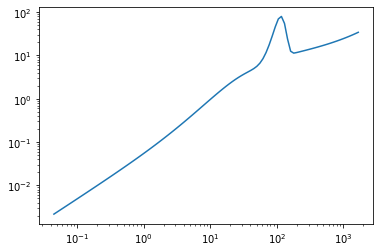

In [85]:
T = np.linspace(float(parameter_dict["Low Temp"]), float(parameter_dict["High Temp"]), 10000)
T = np.logspace(np.log10(float(parameter_dict["Low Temp"])),np.log10(float(parameter_dict["High Temp"])),100)

low_param = [float(parameter_dict[letter]) for letter in generate_alphabet_array(num_low -1, "l")]
hi_param = [float(parameter_dict[letter]) for letter in generate_alphabet_array(num_hi, "H")]
erf_param = float(parameter_dict["erf param"])

print(low_param)
low_param = zero_filter(low_param)
hi_param = zero_filter(hi_param)

print(low_param, hi_param, erf_param)


k = loglog_func(T, low_param, hi_param, erf_param)
plt.plot(T, k)
plt.semilogy()
plt.semilogx()
plt.show()


In [86]:
def definite_integral(x, y, start_x, end_x):
    """
    Compute the definite integral of a function given x and y values between specified bounds using the trapezoidal rule.

    Parameters:
    x (list or array): The x values.
    y (list or array): The corresponding y values.
    start_x (float): The starting x value for integration.
    end_x (float): The ending x value for integration.

    Returns:
    float: The definite integral of the function between the specified bounds.
    """
    # Find indices corresponding to the closest x values to start_x and end_x
    start_index = min(range(len(x)), key=lambda i: abs(x[i] - start_x))
    end_index = min(range(len(x)), key=lambda i: abs(x[i] - end_x))

    # Ensure start_index is not greater than end_index
    start_index, end_index = min(start_index, end_index), max(start_index, end_index)

    integral = 0.0
    for i in range(start_index + 1, end_index + 1):
        integral += (x[i] - x[i-1]) * (y[i] + y[i-1]) / 2.0
    return integral

# Example usage:
x_values = T  # Example x values
y_values = k  # Example y values (squared values of x)
start_x = 189.2  # Start x value for integration
end_x = 260  # End x value for integration
result = definite_integral(x_values, y_values, start_x, end_x)
print("Definite integral between", start_x, "and", end_x, ":", result)



Definite integral between 189.2 and 260 : 808.2365335442025


NIST Fit and Integral